Input: Agricultural related image
1. homogrpahy  and RANSAC
2. Harries corner Detection and Hough transform

In [2]:
pip install opencv-python

     ---------------------------------------- 38.8/38.8 MB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


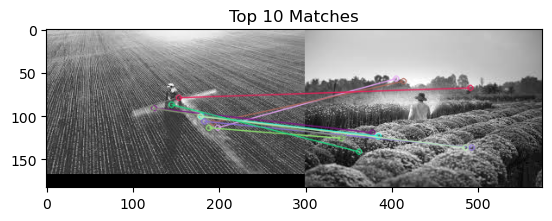

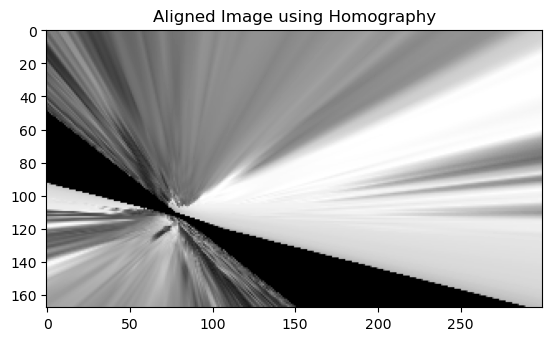

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread(r'C:\Users\abc.jpeg', 0)  # Use uploaded image path
img2 = cv2.imread(r'C:\Users\abc.jpeg', 0)  # Use uploaded image path

if img1 is None:
    raise ValueError("Image 1 not loaded properly. Check the file path.")
if img2 is None:
    raise ValueError("Image 2 not loaded properly. Check the file path.")

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
plt.title("Top 10 Matches")
plt.show()

src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

height, width = img1.shape
img2_aligned = cv2.warpPerspective(img2, H, (width, height))

plt.imshow(img2_aligned, cmap='gray')
plt.title("Aligned Image using Homography")
plt.show()

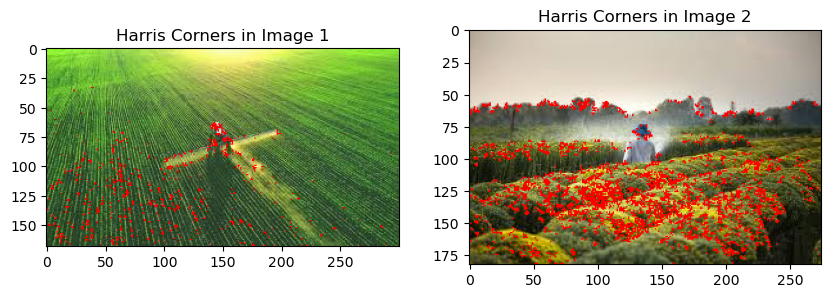

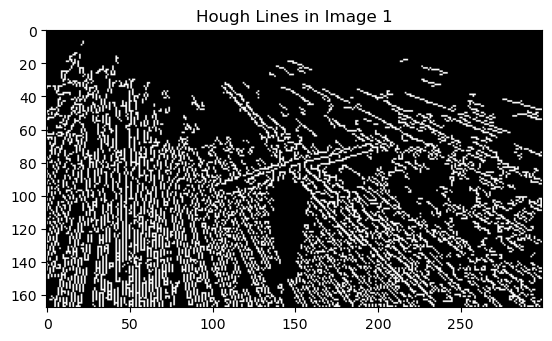

In [11]:
corner_img1 = cv2.imread(r'C:\Users\abc1.jpeg')
corner_img2 = cv2.imread(r'C:\Users\abc1.jpeg')

gray1 = cv2.cvtColor(corner_img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(corner_img2, cv2.COLOR_BGR2GRAY)

gray1 = np.float32(gray1)
dst1 = cv2.cornerHarris(gray1, 2, 3, 0.04)
corner_img1[dst1 > 0.01 * dst1.max()] = [0, 0, 255]

gray2 = np.float32(gray2)
dst2 = cv2.cornerHarris(gray2, 2, 3, 0.04)
corner_img2[dst2 > 0.01 * dst2.max()] = [0, 0, 255] 

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(corner_img1, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners in Image 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corner_img2, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners in Image 2')
plt.show()

edges_img1 = cv2.Canny(img1, 100, 200)
lines_img1 = cv2.HoughLines(edges_img1, 1, np.pi / 180, 150)

line_img = cv2.cvtColor(edges_img1, cv2.COLOR_GRAY2BGR)
if lines_img1 is not None:
    for rho, theta in lines_img1[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(line_img)
plt.title("Hough Lines in Image 1")
plt.show()